In [14]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from collections import Counter

In [15]:
data_dir = '../data/LIS-fingerspelling-dataset'
img_ex = cv2.imread(os.path.join(data_dir, 'a', 'a_ANTONIA_1_bottom.JPG'))
img_ex.shape

(415, 622, 3)

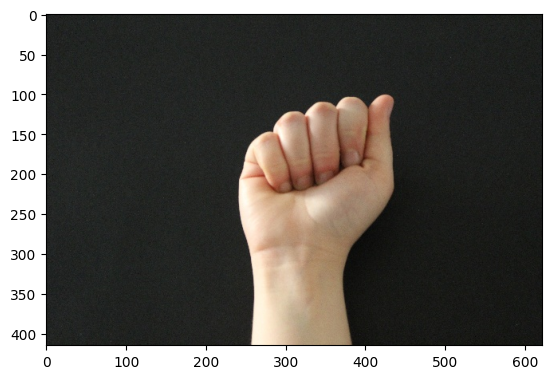

In [16]:
plt.imshow(cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB))

In [17]:
# Automatically creates a dataset form the referred directory. Load the full dataset, shuffle = True ensures randomness
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    seed=123
)

# In order to iterare the element we must use the iterative method
data_iterator = dataset.as_numpy_iterator()
data_iterator

Found 6428 files belonging to 22 classes.


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f8e9c15ce20>)

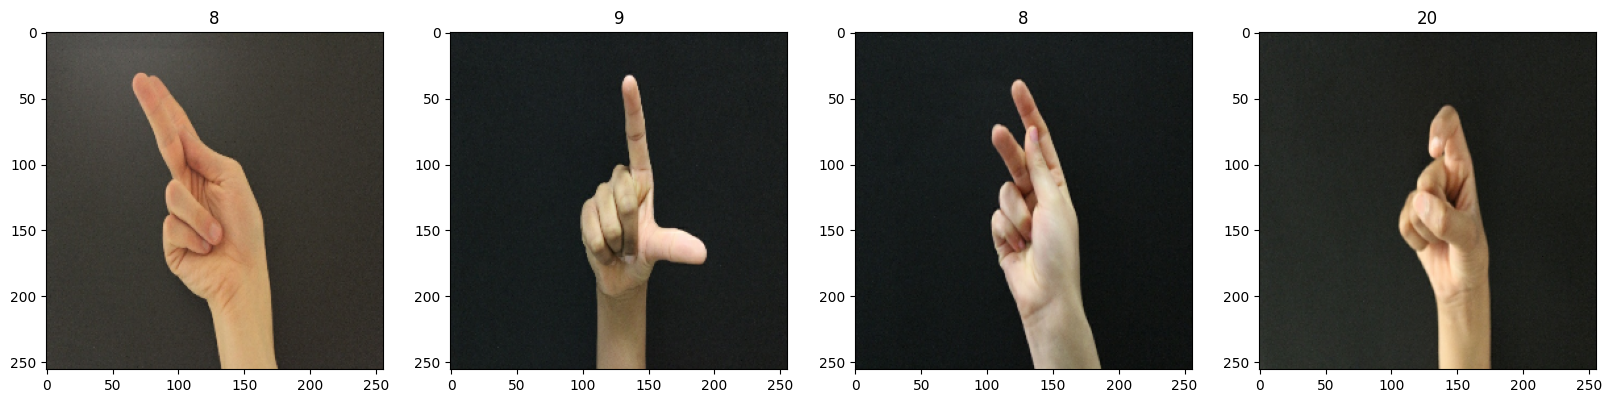

In [18]:
batch = data_iterator.next() # Grabbing a dataset batch

# Exploring a batch labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Data visualization

2025-05-13 17:03:53.123458: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


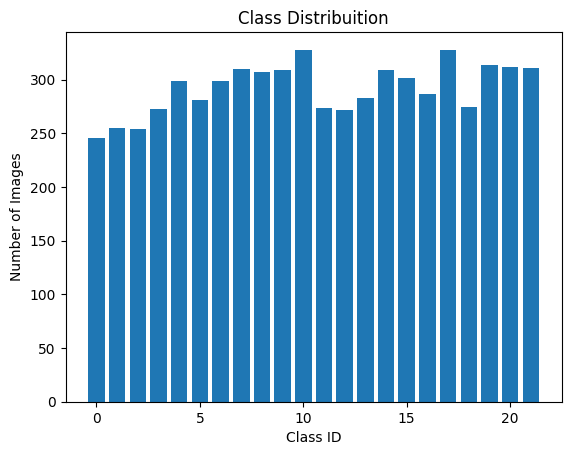

In [19]:
all_labels = []

for _, labels in dataset:
    all_labels.extend(labels.numpy())

label_counts = Counter(all_labels)

# Visualizza distribuzione
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Class Distribuition")
plt.show()

In [30]:
train_dir = '../data/processed/train'

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=123
)

Found 4489 files belonging to 22 classes.


In [31]:
preprocessing_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255), 

    # Data augmentation:
    tf.keras.layers.RandomFlip("horizontal"),  # Simulating left hand
    tf.keras.layers.RandomRotation(0.1),       # Rotations, max ±10%

    # Gaussiano noise
    tf.keras.layers.Lambda(
        lambda x: tf.clip_by_value(
            x + tf.random.normal(tf.shape(x), mean=0.0, stddev=0.05), 0.0, 1.0
        )
    ),

    tf.keras.layers.RandomZoom(0.1)
])

train_ds = train_ds.map(lambda x, y: (preprocessing_model(x), y))

In [42]:
train = train_ds.as_numpy_iterator()
batch = train.next()

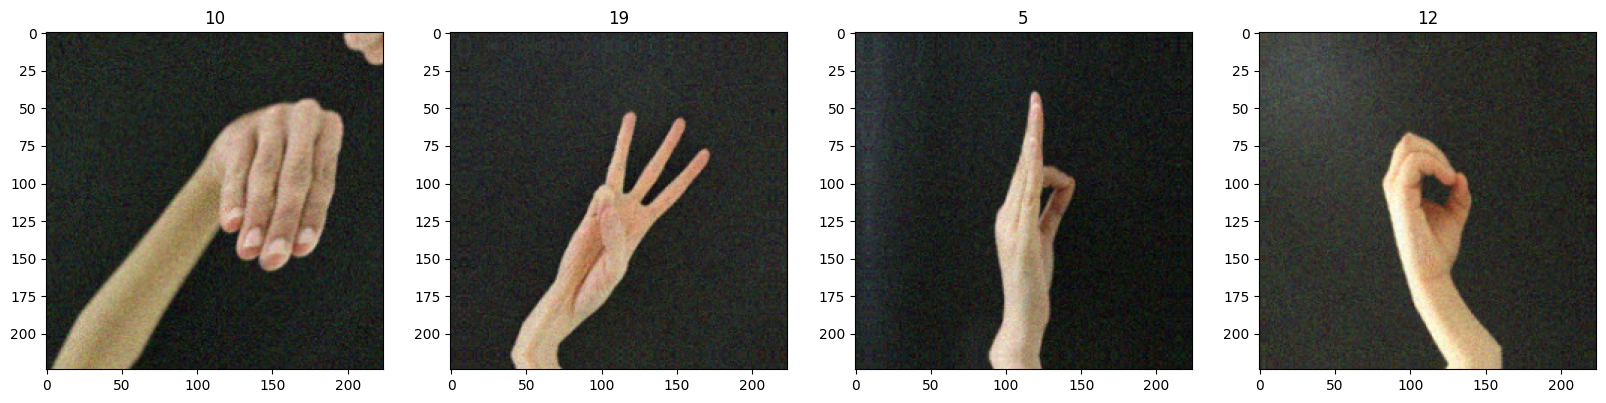

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])